<a href="https://colab.research.google.com/github/jadrzy/Lab-Python-in-Data-Science-/blob/main/notebooks/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#**DATA**





In [1]:
!git clone https://{token}@github.com/jadrzy/Lab-Python-in-Data-Science-.git

Cloning into 'Lab-Python-in-Data-Science-'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 149 (delta 51), reused 77 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (149/149), 1.40 MiB | 5.12 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [19]:
%reset -f

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (MinMaxScaler, StandardScaler,)
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_absolute_error
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import PredictionErrorDisplay



data = pd.read_csv('/content/Lab-Python-in-Data-Science-/datasets/winequality-red.csv', sep = ';') # When data separator needed

tr_data = []  # training data
val_data = [] # validation data
te_data = []  # test data

tr_data, te_data = train_test_split(data, test_size=0.2, random_state=1)

x_train = tr_data.drop('quality', axis=1)
y_train = tr_data['quality']

---
#**6.1**
Implement cross-validation for a selected classifier and regressor. Use accuracy
for the classifier and negated RMSE for the regressor. For regression, convert the negated
output back to RMSE. Calculate the mean of the obtained scores.





In [ ]:
# in case of classification
y_train = tr_data['quality'] > 5.5

clf = LogisticRegression()
clf.max_iter = 10000
clf = svm.SVC()
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
mean = scores.mean()
print(f'Classification accuracy: {scores}')
print(f'Classification accuracy mean: {mean}')

# in case of regression
reg = MLPRegressor(hidden_layer_sizes=(12, 10, 5), random_state=1, max_iter=10000, solver='lbfgs')
scores = cross_val_score(reg, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
scores = np.abs(scores)
mean = scores.mean()
print(f'Regression RMSE: {scores}')
print(f'Regression RMSE mean: {mean}')
%reset -f

Classification accuracy: [0.59765625 0.6015625  0.6953125  0.6328125  0.63529412]
Classification accuracy mean: 0.6325275735294118
Regression RMSE: [0.41120828 0.44403007 0.40559161 0.42744825 0.42374865]
Regression RMSE mean: 0.4224053717493126


---
#**6.2**
Compare the results of 3-fold, 5-fold, and 10-fold cross-validation.




In [ ]:
######################################################
### 3-fold
print('\n 3-fold cross-validation')

# in case of classification
y_train = tr_data['quality'] > 5.5

clf = LogisticRegression()
clf.max_iter = 10000
clf = svm.SVC()
scores = cross_val_score(clf, x_train, y_train, cv=3, scoring='accuracy')
mean = scores.mean()
print(f'Classification accuracy: {scores}')
print(f'Classification accuracy mean: {mean}')

# in case of regression
reg = MLPRegressor(hidden_layer_sizes=(12, 10, 5), random_state=1, max_iter=10000, solver='lbfgs')
scores = cross_val_score(reg, x_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
scores = np.abs(scores)
mean = scores.mean()
print(f'Regression RMSE: {scores}')
print(f'Regression RMSE mean: {mean}')


######################################################
### 5-fold
print('\n 5-fold cross-validation')

# in case of classification
y_train = tr_data['quality'] > 5.5

clf = LogisticRegression()
clf.max_iter = 10000
clf = svm.SVC()
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
mean = scores.mean()
print(f'Classification accuracy: {scores}')
print(f'Classification accuracy mean: {mean}')

# in case of regression
reg = MLPRegressor(hidden_layer_sizes=(12, 10, 5), random_state=1, max_iter=10000, solver='lbfgs')
scores = cross_val_score(reg, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
scores = np.abs(scores)
mean = scores.mean()
print(f'Regression RMSE: {scores}')
print(f'Regression RMSE mean: {mean}')


######################################################
### 10-fold
print('\n 10-fold cross-validation')

# in case of classification
y_train = tr_data['quality'] > 5.5

clf = LogisticRegression()
clf.max_iter = 10000
clf = svm.SVC()
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
mean = scores.mean()
print(f'Classification accuracy: {scores}')
print(f'Classification accuracy mean: {mean}')

# in case of regression
reg = MLPRegressor(hidden_layer_sizes=(12, 10, 5), random_state=1, max_iter=10000, solver='lbfgs')
scores = cross_val_score(reg, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
scores = np.abs(scores)
mean = scores.mean()
print(f'Regression RMSE: {scores}')
print(f'Regression RMSE mean: {mean}')
%reset -f


 3-fold cross-validation
Classification accuracy: [0.60655738 0.657277   0.62910798]
Classification accuracy mean: 0.6309807845250007
Regression RMSE: [0.4325832  0.40482257 0.50732214]
Regression RMSE mean: 0.4482426335091864

 5-fold cross-validation
Classification accuracy: [0.59765625 0.6015625  0.6953125  0.6328125  0.63529412]
Classification accuracy mean: 0.6325275735294118
Regression RMSE: [0.41120828 0.44403007 0.40559161 0.42744825 0.42374865]
Regression RMSE mean: 0.4224053717493126

 10-fold cross-validation
Classification accuracy: [0.578125   0.6171875  0.6640625  0.546875   0.6640625  0.7265625
 0.6796875  0.6015625  0.5859375  0.67716535]
Classification accuracy mean: 0.6341227854330709
Regression RMSE: [0.43462048 0.40300531 0.42355631 0.45708708 0.40611018 0.39576355
 0.40491209 0.45538583 0.58256878 0.41932094]
Regression RMSE mean: 0.43823305551214436


---
#**6.3**
Utilize different metrics for cross-validation.
For classification, evaluate: recall, precision, and f1.
For regression, assess: R2 and mean absolute error.




In [ ]:
# in case of classification
print('\n\nClassification')

y_train = tr_data['quality'] > 5.5

clf = LogisticRegression()
clf.max_iter = 10000
clf = svm.SVC()
scores = cross_validate(clf, x_train, y_train, cv=5,scoring=['f1','accuracy','recall','precision'])

print("\nFit time:")
print(scores['fit_time'])
print("\nScore time:")
print(scores['score_time'])

print("\nAccuracy:")
mean = scores['test_accuracy'].mean()
print(scores['test_accuracy'])
print(f'Accuracy mean: {mean}')

print("\nRecall:")
mean = scores['test_recall'].mean()
print(scores['test_recall'])
print(f'Recall mean: {mean}')

print("\nPrecision:")
mean = scores['test_precision'].mean()
print(scores['test_precision'])
print(f'Precision mean: {mean}')

print("\nF1:")
mean = scores['test_f1'].mean()
print(scores['test_f1'])
print(f'F1 mean: {mean}')


# in case of regression
print('\n\nRegression')

reg = MLPRegressor(hidden_layer_sizes=(12, 10, 5), random_state=1, max_iter=10000, solver='lbfgs')

# R2
scores = cross_val_score(reg, x_train, y_train, cv=5, scoring='r2')
print("\nR2:")
mean = scores.mean()
print(scores)
print(f'R2 mean: {mean}')

# Mean absolute error
scores = cross_val_score(reg, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores = np.abs(scores)
print("\nMean absolute error:")
mean = scores.mean()
print(scores)
print(f'Mean absolute error mean: {mean}')

%reset -f



Classification

Fit time:
[0.07420969 0.08249736 0.09188914 0.07176781 0.07567739]

Score time:
[0.03994608 0.05310845 0.0439713  0.04607749 0.04175925]

Accuracy:
[0.59765625 0.6015625  0.6953125  0.6328125  0.63529412]
Accuracy mean: 0.6325275735294118

Recall:
[0.84057971 0.84057971 0.86956522 0.85507246 0.86131387]
Recall mean: 0.8534221940124829

Precision:
[0.58883249 0.59183673 0.66666667 0.61458333 0.61458333]
Precision mean: 0.6153005110673712

F1:
[0.69253731 0.69461078 0.75471698 0.71515152 0.71732523]
F1 mean: 0.7148683632246133


Regression

R2:
[0.31148619 0.21130106 0.33401469 0.2637143  0.27987673]
R2 mean: 0.28007859348566455

Mean absolute error:
[0.3584211  0.38292951 0.36041393 0.35935426 0.35887772]
Mean absolute error mean: 0.36399930321878377


---
#**6.4**
Implement a grid search for the SVM classifier. Compare different kernels and
different values for C parameter. Use 5-fold cross-validation.





In [ ]:
y_train = tr_data['quality'] > 5.5

clf.max_iter = 10000
clf = svm.SVC()


parameters = {'kernel':['poly', 'rbf' , 'linear'], 'C':[0.1, 1, 10]}


grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator
print(grid_search.cv_results_) # to get all results
cv_res = pd.DataFrame(grid_search.cv_results_) # or use DataFrame
cv_res.sort_values(by='rank_test_score', inplace=True)
display(cv_res) # to display results as a table

%reset -f

{'C': 10, 'kernel': 'linear'}
SVC(C=10, kernel='linear')
{'mean_fit_time': array([0.04150372, 0.0504745 , 0.11712885, 0.06285443, 0.04047046,
       1.47716956, 0.0903388 , 0.0426621 , 8.29138017]), 'std_fit_time': array([1.08526667e-03, 8.37391333e-03, 7.33473096e-03, 7.88827781e-03,
       7.51526307e-04, 8.76380209e-01, 8.65458365e-03, 9.20032384e-04,
       3.25236558e+00]), 'mean_score_time': array([0.00948806, 0.02218475, 0.00780129, 0.01370263, 0.01436157,
       0.01022377, 0.01437011, 0.01394806, 0.00833163]), 'std_score_time': array([6.87306470e-05, 8.42405767e-03, 2.83689938e-04, 5.08340365e-03,
       4.78075456e-04, 1.97988247e-03, 6.59260304e-03, 3.34231032e-04,
       1.54162358e-03]), 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 10.0, 10.0, 10.0],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=1e+20), 'param_kernel': masked_array(data=['poly', 'rbf', 'linear', 'poly', 'rbf', 'linear'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,8.291380,3.252366,0.008332,0.001542,10.0,linear,"{'C': 10, 'kernel': 'linear'}",0.761719,0.703125,0.769531,0.753906,0.749020,0.747460,0.023238,1
5,1.477170,0.876380,0.010224,0.001980,1.0,linear,"{'C': 1, 'kernel': 'linear'}",0.757812,0.703125,0.773438,0.750000,0.741176,0.745110,0.023520,2
2,0.117129,0.007335,0.007801,0.000284,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.757812,0.699219,0.761719,0.730469,0.733333,0.736510,0.022479,3
7,0.042662,0.000920,0.013948,0.000334,10.0,rbf,"{'C': 10, 'kernel': 'rbf'}",0.714844,0.664062,0.769531,0.730469,0.698039,0.715389,0.034913,4
6,0.090339,0.008655,0.014370,0.006593,10.0,poly,"{'C': 10, 'kernel': 'poly'}",0.621094,0.617188,0.695312,0.652344,0.639216,0.645031,0.028156,5
4,0.040470,0.000752,0.014362,0.000478,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",0.597656,0.601562,0.695312,0.632812,0.635294,0.632528,0.034999,6
3,0.062854,0.007888,0.013703,0.005083,1.0,poly,"{'C': 1, 'kernel': 'poly'}",0.578125,0.605469,0.664062,0.625000,0.627451,0.620021,0.028237,7
1,0.050475,0.008374,0.022185,0.008424,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.554688,0.601562,0.675781,0.613281,0.623529,0.613768,0.038938,8
0,0.041504,0.001085,0.009488,0.000069,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.558594,0.609375,0.625000,0.578125,0.627451,0.599709,0.027052,9


---
#**6.5**
Implement a grid search for another classifier. Choose an appropriate parameter
space and scoring metric.





In [ ]:
y_train = tr_data['quality'] > 5.5

clf = MLPClassifier()

parameters = {
    'solver': ['lbfgs', 'adam', 'sgd'],
    'hidden_layer_sizes': [(x,) for x in range(1, 11)]  # Hidden layers with 1 to 10 neurons
}


grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator
print(grid_search.cv_results_) # to get all results
cv_res = pd.DataFrame(grid_search.cv_results_) # or use DataFrame
cv_res.sort_values(by='rank_test_score', inplace=True)
display(cv_res) # to display results as a table

%reset -f

{'hidden_layer_sizes': (8,), 'solver': 'lbfgs'}
MLPClassifier(hidden_layer_sizes=(8,), solver='lbfgs')
{'mean_fit_time': array([0.05453506, 0.38089919, 0.25290055, 0.00647936, 0.40609932,
       0.14306188, 0.11782346, 0.39482975, 0.34013934, 0.21088953,
       0.60132599, 0.20073133, 0.06006455, 0.47220802, 0.19177666,
       0.15158734, 0.44141703, 0.34249201, 0.25271401, 0.62737541,
       0.14622507, 0.16104646, 0.45307717, 0.21743846, 0.187325  ,
       1.71207409, 0.53814778, 0.28525395, 0.48220778, 0.18400965]), 'std_fit_time': array([0.09237325, 0.10697695, 0.08552134, 0.00057985, 0.10652884,
       0.08848626, 0.0564842 , 0.0994537 , 0.09394829, 0.03212363,
       0.13947646, 0.05063755, 0.06343109, 0.03360082, 0.12049588,
       0.02875631, 0.01628391, 0.13137081, 0.04546583, 0.16491162,
       0.05723731, 0.01965946, 0.03364515, 0.06702698, 0.03893765,
       0.39151962, 0.15789763, 0.04435267, 0.03783069, 0.05443173]), 'mean_score_time': array([0.00352688, 0.00304451, 0.003

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.161046,0.019659,0.003006,0.000202,"(8,)",lbfgs,"{'hidden_layer_sizes': (8,), 'solver': 'lbfgs'}",0.757812,0.687500,0.769531,0.746094,0.741176,0.740423,0.028225,1
24,0.187325,0.038938,0.003301,0.000790,"(9,)",lbfgs,"{'hidden_layer_sizes': (9,), 'solver': 'lbfgs'}",0.761719,0.703125,0.777344,0.746094,0.713725,0.740401,0.028117,2
18,0.252714,0.045466,0.003997,0.000233,"(7,)",lbfgs,"{'hidden_layer_sizes': (7,), 'solver': 'lbfgs'}",0.757812,0.652344,0.785156,0.742188,0.749020,0.737304,0.044922,3
27,0.285254,0.044353,0.003999,0.000161,"(10,)",lbfgs,"{'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}",0.750000,0.695312,0.777344,0.734375,0.725490,0.736504,0.027102,4
15,0.151587,0.028756,0.002879,0.000184,"(6,)",lbfgs,"{'hidden_layer_sizes': (6,), 'solver': 'lbfgs'}",0.761719,0.687500,0.753906,0.730469,0.737255,0.734170,0.025883,5
9,0.210890,0.032124,0.004191,0.000568,"(4,)",lbfgs,"{'hidden_layer_sizes': (4,), 'solver': 'lbfgs'}",0.738281,0.675781,0.773438,0.746094,0.572549,0.701229,0.071841,6
6,0.117823,0.056484,0.002894,0.000167,"(3,)",lbfgs,"{'hidden_layer_sizes': (3,), 'solver': 'lbfgs'}",0.746094,0.687500,0.785156,0.742188,0.537255,0.699638,0.086945,7
28,0.482208,0.037831,0.003012,0.000171,"(10,)",adam,"{'hidden_layer_sizes': (10,), 'solver': 'adam'}",0.671875,0.617188,0.718750,0.691406,0.635294,0.666903,0.036835,8
22,0.453077,0.033645,0.002864,0.000130,"(8,)",adam,"{'hidden_layer_sizes': (8,), 'solver': 'adam'}",0.667969,0.617188,0.726562,0.644531,0.635294,0.658309,0.037848,9
13,0.472208,0.033601,0.008200,0.010306,"(5,)",adam,"{'hidden_layer_sizes': (5,), 'solver': 'adam'}",0.601562,0.597656,0.730469,0.691406,0.662745,0.656768,0.051399,10


---
#**6.6**
Implement a grid search for the selected regressor




In [ ]:
reg = MLPRegressor()

parameters = {
    'solver': ['lbfgs', 'adam', 'sgd'],
    'hidden_layer_sizes': [(x,) for x in range(1, 11)]  # Hidden layers with 1 to 10 neurons
}


grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator
print(grid_search.cv_results_) # to get all results
cv_res = pd.DataFrame(grid_search.cv_results_) # or use DataFrame
cv_res.sort_values(by='rank_test_score', inplace=True)
display(cv_res) # to display results as a table

%reset -f

{'hidden_layer_sizes': (8,), 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=(8,), solver='lbfgs')
{'mean_fit_time': array([0.00954518, 0.46313434, 0.28554382, 0.06153464, 0.41097155,
       0.16398358, 0.08092937, 0.39462938, 0.18515491, 0.09991212,
       0.38973312, 0.21867433, 0.13717294, 0.60571475, 0.16795983,
       0.09322782, 0.39583321, 0.16605859, 0.10899339, 0.39919391,
       0.08905678, 0.12698736, 0.40240269, 0.2331696 , 0.30502973,
       0.49109578, 0.18229575, 0.21796174, 0.43100619, 0.15431604]), 'std_fit_time': array([0.00354885, 0.01645459, 0.12318498, 0.0430298 , 0.02513957,
       0.01725883, 0.03737638, 0.0377242 , 0.04479562, 0.00561883,
       0.01228864, 0.068862  , 0.03117352, 0.12379329, 0.02662144,
       0.02477011, 0.01849849, 0.03514642, 0.04260191, 0.02641323,
       0.03842399, 0.01294615, 0.05703838, 0.06121383, 0.15045038,
       0.14690761, 0.03919991, 0.04246661, 0.02940199, 0.06880531]), 'mean_score_time': array([0.00275488, 0.00291286, 0.0030

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.126987,0.012946,0.002241,0.000139,"(8,)",lbfgs,"{'hidden_layer_sizes': (8,), 'solver': 'lbfgs'}",-0.474306,-0.437071,-0.423746,-0.433027,-0.447313,-0.443092,0.017343,1
9,0.099912,0.005619,0.002454,0.000455,"(4,)",lbfgs,"{'hidden_layer_sizes': (4,), 'solver': 'lbfgs'}",-0.462236,-0.448129,-0.420325,-0.440470,-0.451768,-0.444586,0.014008,2
24,0.305030,0.150450,0.003978,0.001279,"(9,)",lbfgs,"{'hidden_layer_sizes': (9,), 'solver': 'lbfgs'}",-0.485541,-0.441906,-0.415281,-0.451881,-0.434934,-0.445909,0.023156,3
27,0.217962,0.042467,0.002913,0.000072,"(10,)",lbfgs,"{'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}",-0.470422,-0.461650,-0.425055,-0.430810,-0.442062,-0.446000,0.017472,4
12,0.137173,0.031174,0.003103,0.000050,"(5,)",lbfgs,"{'hidden_layer_sizes': (5,), 'solver': 'lbfgs'}",-0.473036,-0.455727,-0.419286,-0.509305,-0.544072,-0.480285,0.043099,5
18,0.108993,0.042602,0.002404,0.000381,"(7,)",lbfgs,"{'hidden_layer_sizes': (7,), 'solver': 'lbfgs'}",-0.460204,-0.642867,-0.414045,-0.467346,-0.445225,-0.485937,0.080574,6
15,0.093228,0.024770,0.002388,0.000390,"(6,)",lbfgs,"{'hidden_layer_sizes': (6,), 'solver': 'lbfgs'}",-0.466266,-0.649011,-0.427081,-0.451967,-0.443010,-0.487467,0.081767,7
6,0.080929,0.037376,0.002244,0.000143,"(3,)",lbfgs,"{'hidden_layer_sizes': (3,), 'solver': 'lbfgs'}",-0.704319,-0.485560,-0.413479,-0.434401,-0.441790,-0.495910,0.106817,8
22,0.402403,0.057038,0.002556,0.000381,"(8,)",adam,"{'hidden_layer_sizes': (8,), 'solver': 'adam'}",-0.509443,-0.470305,-0.514969,-0.584855,-0.682986,-0.552511,0.074956,9
20,0.089057,0.038424,0.002456,0.000359,"(7,)",sgd,"{'hidden_layer_sizes': (7,), 'solver': 'sgd'}",-0.581390,-0.505598,-0.521294,-0.611515,-0.585574,-0.561074,0.040540,10


---
#**6.9**
Train the selected model with the tuned hyperparameters using the full training
set. Evaluate its performance:

• For classification, assess: accuracy, recall, precision, and F1 score.

• For regression, assess: R2 and mean absolute error

In [ ]:
## CLASSIFICATION
print("\nCLASSIFICATION")
## building model
y_train = tr_data['quality'] > 5.5

clf = svm.SVC(kernel='linear', C=10)
clf.max_iter = 10000
clf.fit(x_train, y_train)


## prediction on test data
x_test = te_data.drop('quality', axis=1)
y_test = te_data['quality'] > 5.5

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

tp = ((y_pred == y_test) & y_test).sum() # true positive
tn = ((y_pred == y_test) & ~y_test).sum() # true negative
fp = ((y_pred != y_test) & ~y_test).sum() # false positive
fn = ((y_pred != y_test) & y_test).sum() # false negative


print(f'True positive: {tp}')
print(f'True negative: {tn}')
print(f'False positive: {fp}')
print(f'False negative: {fn}')


## REGRESSION
print("\nREGRESSION")
## building model

reg = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(8,))
reg.fit(x_train, y_train)

## prediction on test data
x_test = te_data.drop('quality', axis=1)
y_test = te_data['quality'] > 5.5

y_pred = reg.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MAE: {mae}')


CLASSIFICATION
Accuracy: 0.65
Precision: 0.6298076923076923
Recall: 0.7891566265060241
F1: 0.7005347593582888
True positive: 131
True negative: 77
False positive: 77
False negative: 35

REGRESSION
R2: 0.31500758644089255
MAE: 0.35390838305343675


---
#**6.10**
For the selected classifier, calculate the true positive rate, true negative rate,
false positive rate, and false negative rate.


In [ ]:
## CLASSIFICATION
print("\nCLASSIFICATION")
## building model
y_train = tr_data['quality'] > 5.5

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8,))
clf.max_iter = 10000
clf.fit(x_train, y_train)


## prediction on test data
x_test = te_data.drop('quality', axis=1)
y_test = te_data['quality'] > 5.5

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

tp = ((y_pred == y_test) & y_test).sum() # true positive
tn = ((y_pred == y_test) & ~y_test).sum() # true negative
fp = ((y_pred != y_test) & ~y_test).sum() # false positive
fn = ((y_pred != y_test) & y_test).sum() # false negative
# or convenient way using confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f'True positive: {tp}')
print(f'True negative: {tn}')
print(f'False positive: {fp}')
print(f'False negative: {fn}')

%reset -f


CLASSIFICATION
Accuracy: 0.759375
Precision: 0.7763975155279503
Recall: 0.7530120481927711
F1: 0.764525993883792
True positive: 125
True negative: 118
False positive: 36
False negative: 41


---
#**6.11**
For the selected classifier, plot the ROC curve.



CLASSIFICATION


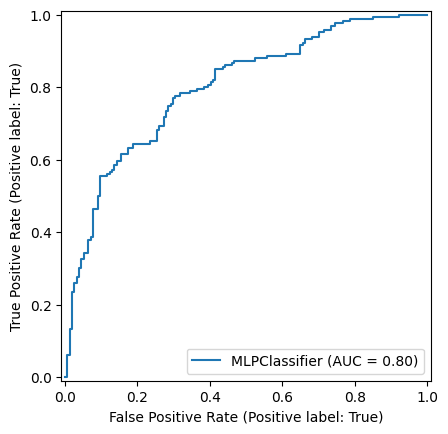

In [3]:
## CLASSIFICATION
print("\nCLASSIFICATION")
## building model
y_train = tr_data['quality'] > 5.5

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8,))
clf.max_iter = 10000
clf.fit(x_train, y_train)


## prediction on test data
x_test = te_data.drop('quality', axis=1)
y_test = te_data['quality'] > 5.5


RocCurveDisplay.from_estimator(clf, x_test, y_test)

%reset -f

---
#**6.12**
For the selected classifier, plot the precision-recall graph.



CLASSIFICATION


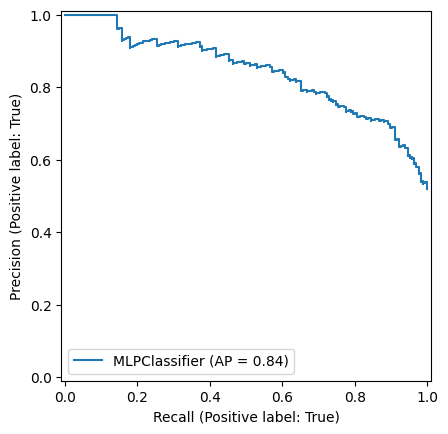

In [6]:
## CLASSIFICATION
print("\nCLASSIFICATION")

## building model
y_train = tr_data['quality'] > 5.5

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8,))
clf.max_iter = 10000
clf.fit(x_train, y_train)


## prediction on test data
x_test = te_data.drop('quality', axis=1)
y_test = te_data['quality'] > 5.5

PrecisionRecallDisplay.from_estimator(clf, x_test, y_test)
plt.show()

%reset -f

---
#**6.13**
For the selected classifier, plot the confusion matrix.


CLASSIFICATION


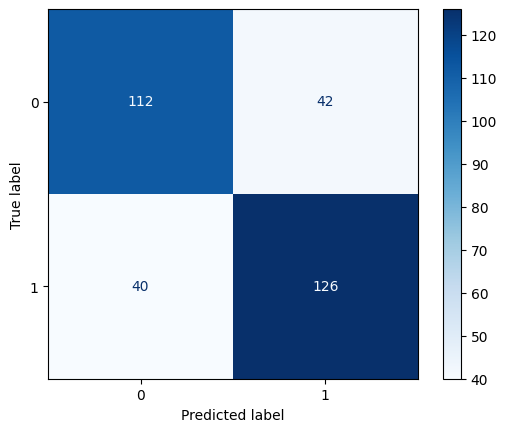

In [9]:
## CLASSIFICATION
print("\nCLASSIFICATION")
## building model
y_train = tr_data['quality'] > 5.5

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8,))
clf.max_iter = 10000
clf.fit(x_train, y_train)


## prediction on test data
x_test = te_data.drop('quality', axis=1)
y_test = te_data['quality'] > 5.5

y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

%reset -f

---
#**6.14**
For the selected regressor, plot the prediction error.


REGRESSION


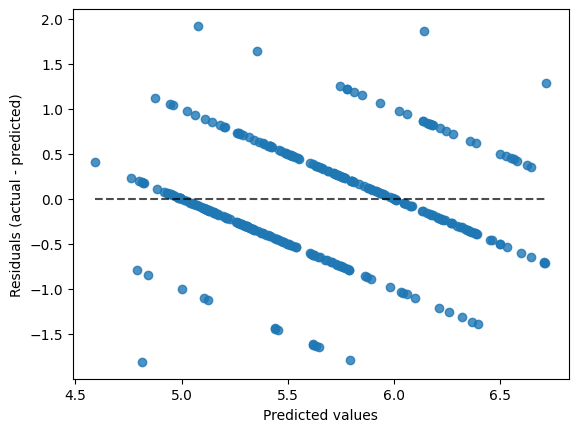

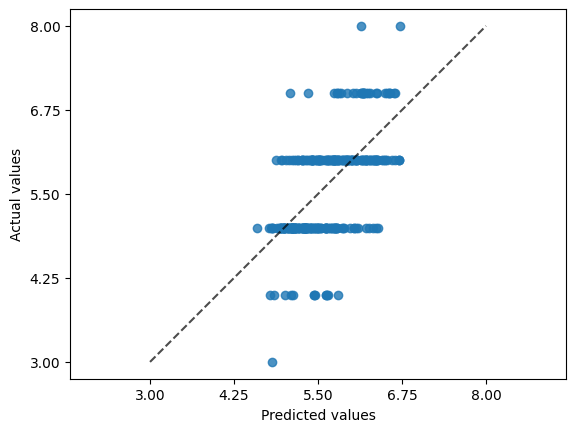

In [20]:
## REGRESSION
print("\nREGRESSION")
## building model

reg = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(8,))
reg.max_iter = 10000
reg.fit(x_train, y_train)

## prediction on test data
x_test = te_data.drop('quality', axis=1)
y_test = te_data['quality']

y_pred = reg.predict(x_test)

PredictionErrorDisplay.from_estimator(reg, x_test, y_test, kind="residual_vs_predicted")
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred, kind="actual_vs_predicted")

%reset -f